## **PROGETTO PERSONALE (COVID)**

In [2]:
import os
import dotenv
import sqlalchemy
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as  sns

dbcovid = pd.read_csv('DATABASES/owid-covid-data.csv')
#connessione al db

dbcovid
#visualizzazione generale del db

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,ZWE,Africa,Zimbabwe,2024-07-31,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429431,ZWE,Africa,Zimbabwe,2024-08-01,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429432,ZWE,Africa,Zimbabwe,2024-08-02,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429433,ZWE,Africa,Zimbabwe,2024-08-03,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN


In [4]:
# 1. Si richiede di verificare le dimensioni del dataset e i relativi metadati

dbcovid.shape  
#quante righe e quante colonne sono presenti

(429435, 67)

In [6]:
# dbcovid.info()
#tipo di dati per ogni colonna

# il formato della data era in object quindi si deve trasformare
dbcovid['date'] = pd.to_datetime(dbcovid['date'])
print(dbcovid.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    429435 non-null  object        
 1   continent                                   402910 non-null  object        
 2   location                                    429435 non-null  object        
 3   date                                        429435 non-null  datetime64[ns]
 4   total_cases                                 411804 non-null  float64       
 5   new_cases                                   410159 non-null  float64       
 6   new_cases_smoothed                          408929 non-null  float64       
 7   total_deaths                                411804 non-null  float64       
 8   new_deaths                                  410608 non-null  float64      

In [8]:
dbcovid.columns
#nomi delle colonne

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [10]:
dbcovid.describe()
#panoramica delle statistiche generali

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,429435,4.118040e+05,4.101590e+05,4.089290e+05,4.118040e+05,410608.000000,409378.000000,411804.000000,410159.000000,408929.000000,...,243817.000000,161741.000000,290689.000000,390299.000000,319127.000000,4.294350e+05,1.341100e+04,13411.000000,13411.000000,13411.000000
mean,2022-04-21 01:06:25.463691008,7.365292e+06,8.017360e+03,8.041026e+03,8.125957e+04,71.852139,72.060873,112096.199396,122.357074,122.713844,...,33.097723,50.649264,3.106912,73.702098,0.722139,1.520336e+08,5.604765e+04,9.766431,10.925353,1772.666400
min,2020-01-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,-3.772610e+04,-44.230000,-95.920000,-2936.453100
25%,2021-03-05 00:00:00,6.280750e+03,0.000000e+00,0.000000e+00,4.300000e+01,0.000000,0.000000,1916.100500,0.000000,0.000000,...,22.600000,20.859000,1.300000,69.500000,0.602000,5.237980e+05,1.765000e+02,2.060000,-1.500000,116.872242
50%,2022-04-20 00:00:00,6.365300e+04,0.000000e+00,1.200000e+01,7.990000e+02,0.000000,0.000000,29145.475000,0.000000,2.794000,...,33.100000,49.542000,2.500000,75.050000,0.740000,6.336393e+06,6.815199e+03,8.130000,5.660000,1270.801400
75%,2023-06-08 00:00:00,7.582720e+05,0.000000e+00,3.132860e+02,9.574000e+03,0.000000,3.143000,156770.190000,0.000000,56.253000,...,41.500000,82.502000,4.210000,79.460000,0.829000,3.296952e+07,3.912804e+04,15.160000,15.575000,2883.024150
max,2024-08-14 00:00:00,7.758668e+08,4.423623e+07,6.319461e+06,7.057132e+06,103719.000000,14817.000000,763598.600000,241758.230000,34536.890000,...,78.100000,100.000000,13.800000,86.750000,0.957000,7.975105e+09,1.349776e+06,78.080000,378.220000,10293.515000
std,NaN,4.477582e+07,2.296649e+05,8.661611e+04,4.411901e+05,1368.322990,513.636567,162240.412419,1508.778583,559.701638,...,13.853948,31.905375,2.549205,7.387914,0.148903,6.975408e+08,1.568691e+05,12.040658,24.560706,1991.892769


In [12]:
dbcovid.isna().sum()
#quanti dati nulli ci sono e in quali colonne

iso_code                                        0
continent                                   26525
location                                        0
date                                            0
total_cases                                 17631
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       416024
excess_mortality_cumulative                416024
excess_mortality                           416024
excess_mortality_cumulative_per_million    416024
Length: 67, dtype: int64

In [14]:
dbcovid.duplicated().sum()
#verifico che non ci siano duplicati

0

In [16]:
#analisi delle colonne categoriche
for column in dbcovid.columns:
    if dbcovid[column].dtype == 'object':
        print(f'{column} column contains categorical data')
        unique_count = dbcovid[column].nunique()
        print(f'{column} contains {unique_count} unique values')
        all_count = dbcovid[column].value_counts()
        print(f'distribution of every unique value is as such:')
        print(all_count)
        print()

iso_code column contains categorical data
iso_code contains 255 unique values
distribution of every unique value is as such:
iso_code
OWID_HIC    3026
OWID_EUN    3024
OWID_UMC    3013
OWID_LMC    2983
OWID_LIC    2724
            ... 
OWID_SCT    1305
OWID_WLS    1198
MAC          795
OWID_CYN     691
ESH            1
Name: count, Length: 255, dtype: int64

continent column contains categorical data
continent contains 6 unique values
distribution of every unique value is as such:
continent
Africa           95419
Europe           91031
Asia             84199
North America    68638
Oceania          40183
South America    23440
Name: count, dtype: int64

location column contains categorical data
location contains 255 unique values
distribution of every unique value is as such:
location
High-income countries            3026
European Union (27)              3024
Upper-middle-income countries    3013
Lower-middle-income countries    2983
Low-income countries             2724
               

**total_cases: Total confirmed cases of COVID-19. Counts can include probable cases, where reported.**

**new_cases: New confirmed cases of COVID-19. Counts can include probable cases, where reported.**
**In rare cases where our source reports a negative daily change due to a data correction, we setthis metric to NA.**

**La colonna total_cases del dataset è in formato cumulativo, aggiornandosi solo quando vengono registrati nuovi casi.** 
**Pertanto, fino a nuovi contagi, il valore rimane invariato. Per le analisi settimanali, ho scelto di utilizzare la colonna new_cases,** 
**che rappresenta i nuovi contagi settimanalmente, offrendo una visione più precisa e aggiornata dei contagi senza ripetere dati.**

## **#2 CASI PER CONTINENTE**

In [18]:
# 2. Si chiede di trovare, per ogni continente: 
# a. il numero di casi fin dall'inizio della pandemia 

casesxcontinents = dbcovid.groupby('continent')['new_cases'].sum()
print(casesxcontinents)
#numero totale di casi per ogni continente

continent
Africa            13146831.0
Asia             301564180.0
Europe           252916868.0
North America    124492698.0
Oceania           15003468.0
South America     68811012.0
Name: new_cases, dtype: float64


In [20]:
cases_tot_continents = casesxcontinents.sum()
print(cases_tot_continents)
#totale casi per tutti i continenti (qui i continenti hanno i casi assegnati)

775935057.0


In [22]:
# b. la percentuale rispetto al totale mondiale del numero di casi

percentage_cases = round((casesxcontinents/cases_tot_continents) *100, 2)
print(percentage_cases)

continent
Africa            1.69
Asia             38.86
Europe           32.60
North America    16.04
Oceania           1.93
South America     8.87
Name: new_cases, dtype: float64


**continent: Continent of the geographical location**

**location: Geographical location**

**Analizzando il dataset, ho notato che nella colonna location sono presenti entità vaghe, come 'world', 'European Union (27)' e 'income countries', che non corrispondono a località geografiche precise e, in alcuni casi, non hanno il continente assegnato. Per evitare ambiguità, ho deciso di escludere queste voci e concentrarmi solo sui dati relativi ai continenti, associati a località geografiche precise.**

## **#3 CASI IN ITALIA NEL 2022**


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
186002,ITA,Europe,Italy,2022-01-01,5622431.0,0.0,36797.000,136530.0,0.0,140.857,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186003,ITA,Europe,Italy,2022-01-02,6267035.0,644604.0,92086.286,137513.0,983.0,140.429,...,27.8,NaN,3.18,83.51,0.892,59037472,168226.3,12.99,8.06,2849.4834
186004,ITA,Europe,Italy,2022-01-03,6267035.0,0.0,92086.286,137513.0,0.0,140.429,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186005,ITA,Europe,Italy,2022-01-04,6267035.0,0.0,92086.286,137513.0,0.0,140.429,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186006,ITA,Europe,Italy,2022-01-05,6267035.0,0.0,92086.286,137513.0,0.0,140.429,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186362,ITA,Europe,Italy,2022-12-27,25060503.0,0.0,18918.143,184168.0,0.0,114.000,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186363,ITA,Europe,Italy,2022-12-28,25060503.0,0.0,18918.143,184168.0,0.0,114.000,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186364,ITA,Europe,Italy,2022-12-29,25060503.0,0.0,18918.143,184168.0,0.0,114.000,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186365,ITA,Europe,Italy,2022-12-30,25060503.0,0.0,18918.143,184168.0,0.0,114.000,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN


'il totale dei casi in Italia nel 2022 è di: 19438072.0'

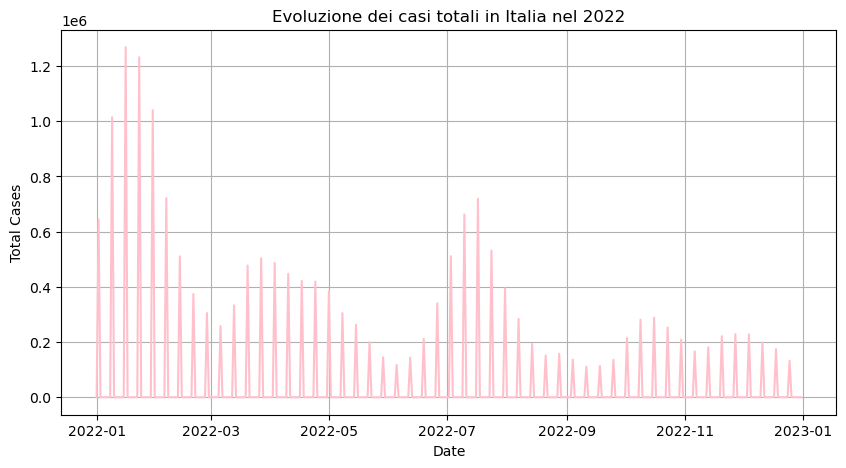

In [26]:
# 3. Selezionare i dati relativi all'Italia nel 2022 e, poiché i nuovi casi vengono registrati settimanalmente,
# filtrare via i giorni che non hanno misurazioni; quindi mostrare con dei grafici adeguati

# a. l'evoluzione dei casi totali dall'inizio alla fine dell'anno

filtro = (dbcovid['location'] == 'Italy') & (dbcovid['date'].dt.year == 2022)
Italy2022 = dbcovid.loc[filtro]
display(Italy2022)
#mi creo dei filtri con dei criteri specifici che mi serviranno per verificare quanto richiesto dall'esercizio ( noto che sono 365 righe, quindi corrispondono ad un anno)

Italy2022 = Italy2022.dropna(subset=['new_cases'])
#rimuovo i valori nulli che non sono necessari perché il calcolo dei dati che viene scritto nel database viene calcolato settimanalmente

Italy2022 = Italy2022.sort_values(by='date') 
#metto le date in ordine crescente per facilitare il grafico

tot_casi_italia_2022 = Italy2022['new_cases'].sum()
display(f'il totale dei casi in Italia nel 2022 è di: {tot_casi_italia_2022}')
#ho sommato tutti i casi in italia del 2022

plt.figure(figsize=[10, 5])
#imposto la grandezza del grafico (larghezza e altezza)

plt.plot(Italy2022['date'], Italy2022['new_cases'], label='Casi Totali in Italia', color='pink')
#creo un grafico con i dati del nuovo dataframe Italy2022 che mi sono creata in precedenza

plt.title("Evoluzione dei casi totali in Italia nel 2022")
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.grid(True)
# aggiungo titoli ed etichette al grafico per renderlo più chiaro nella leggibilità

## **CASI IN ITALIA NEL 2023**

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
186367,ITA,Europe,Italy,2023-01-01,25192831.0,132328.0,18904.000,184918.0,750.0,107.143,...,27.8,NaN,3.18,83.51,0.892,59037472,240288.31,12.42,11.74,4081.6238
186368,ITA,Europe,Italy,2023-01-02,25192831.0,0.0,18904.000,184918.0,0.0,107.143,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186369,ITA,Europe,Italy,2023-01-03,25192831.0,0.0,18904.000,184918.0,0.0,107.143,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186370,ITA,Europe,Italy,2023-01-04,25192831.0,0.0,18904.000,184918.0,0.0,107.143,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186371,ITA,Europe,Italy,2023-01-05,25192831.0,0.0,18904.000,184918.0,0.0,107.143,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186727,ITA,Europe,Italy,2023-12-27,26626211.0,0.0,8306.143,195179.0,0.0,61.714,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186728,ITA,Europe,Italy,2023-12-28,26626211.0,0.0,8306.143,195179.0,0.0,61.714,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186729,ITA,Europe,Italy,2023-12-29,26626211.0,0.0,8306.143,195179.0,0.0,61.714,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186730,ITA,Europe,Italy,2023-12-30,26626211.0,0.0,8306.143,195179.0,0.0,61.714,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN


'il totale dei casi in Italia nel 2023 è di: 1601116.0'

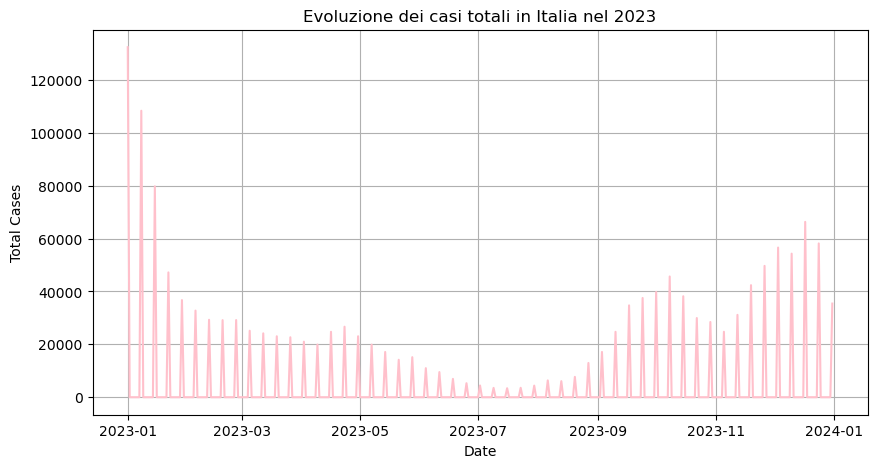

In [34]:
filtro = (dbcovid['location'] == 'Italy') & (dbcovid['date'].dt.year == 2023)
Italy2023 = dbcovid.loc[filtro]
display(Italy2023)
Italy2023 = Italy2023.dropna(subset=['new_cases'])
#mi creo dei filtri con dei criteri specifici che mi serviranno per verificare i casi nel 2023

Italy2023 = Italy2023.sort_values(by='date') 
#metto in ordine crescente la data

tot_casi_italia_2023 = Italy2023['new_cases'].sum()
display(f'il totale dei casi in Italia nel 2023 è di: {tot_casi_italia_2023}')
#tot casi in italia 2023

plt.figure(figsize=[10, 5])
#imposto la grandezza del grafico (larghezza e altezza)

plt.plot(Italy2023['date'], Italy2023['new_cases'], label='Casi Totali in Italia', color='pink')
#creo un grafico 

plt.title("Evoluzione dei casi totali in Italia nel 2023")
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.grid(True)

## **CASI IN ITALIA NEL 2024 FINO AD AGOSTO**

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
186732,ITA,Europe,Italy,2024-01-01,26661619.0,0.0,5058.286,195580.0,0.0,57.286,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186733,ITA,Europe,Italy,2024-01-02,26661619.0,0.0,5058.286,195580.0,0.0,57.286,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186734,ITA,Europe,Italy,2024-01-03,26661619.0,0.0,5058.286,195580.0,0.0,57.286,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186735,ITA,Europe,Italy,2024-01-04,26661619.0,0.0,5058.286,195580.0,0.0,57.286,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186736,ITA,Europe,Italy,2024-01-05,26661619.0,0.0,5058.286,195580.0,0.0,57.286,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186947,ITA,Europe,Italy,2024-08-03,26774728.0,0.0,2239.286,197301.0,0.0,4.857,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186948,ITA,Europe,Italy,2024-08-04,26781078.0,6350.0,907.143,197307.0,6.0,0.857,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186949,ITA,Europe,Italy,2024-08-05,NaN,NaN,NaN,NaN,NaN,NaN,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186950,ITA,Europe,Italy,2024-08-06,NaN,NaN,NaN,NaN,NaN,NaN,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN


'il totale dei casi in Italia nel 2024 è di: 119459.0'

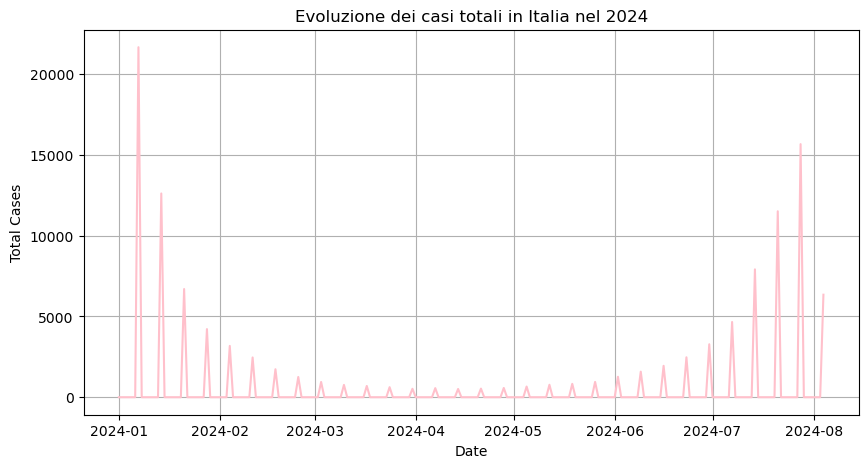

In [28]:
filtro = (dbcovid['location'] == 'Italy') & (dbcovid['date'].dt.year == 2024)
Italy2024 = dbcovid.loc[filtro]
display(Italy2024)
Italy2024 = Italy2024.dropna(subset=['new_cases'])
#sono 220 righe perché i dati del 2024 sono analizzati fino ad Agosto

Italy2024 = Italy2024.sort_values(by='date') 
#metto in ordine crescente la data (dal più lontano al più recente)

tot_casi_italia_2024 = Italy2024['new_cases'].sum()
display(f'il totale dei casi in Italia nel 2024 è di: {tot_casi_italia_2024}')
#ho sommato tutti i casi in italia del 2024

plt.figure(figsize=[10, 5])
#imposto la grandezza del grafico (larghezza e altezza)

plt.plot(Italy2024['date'], Italy2024['new_cases'], label='Casi Totali in Italia', color='pink')
#creo un grafico

plt.title("Evoluzione dei casi totali in Italia nel 2024")
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.grid(True)

**Ho notato che non riesco ad eliminare i valori nulli, probabilmente perché sono stringhe. in questo caso, dopo un'attenta analisi da excel ho appurato che i NaN non vanno ad intaccare l'analisi dati, quindi ho deciso di lasciarli**

## **CASI IN ITALIA DAL 2023 AL 2024(FINO AD AGOSTO)**
qui vorrei comparare come richiede l'esercizio i casi nel 2022 con quelli del 2023/2024
cosa è cambiato? un anno precedente comparato a due anni successivi cosa ha comportato?

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
1457,AFG,Asia,Afghanistan,2024-01-01,230375.0,0.0,42.857,7973.0,0.0,0.429,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1458,AFG,Asia,Afghanistan,2024-01-02,230375.0,0.0,42.857,7973.0,0.0,0.429,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1459,AFG,Asia,Afghanistan,2024-01-03,230375.0,0.0,42.857,7973.0,0.0,0.429,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1460,AFG,Asia,Afghanistan,2024-01-04,230375.0,0.0,42.857,7973.0,0.0,0.429,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1461,AFG,Asia,Afghanistan,2024-01-05,230375.0,0.0,42.857,7973.0,0.0,0.429,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,ZWE,Africa,Zimbabwe,2024-07-31,266386.0,0.0,0.000,5740.0,0.0,0.000,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429431,ZWE,Africa,Zimbabwe,2024-08-01,266386.0,0.0,0.000,5740.0,0.0,0.000,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429432,ZWE,Africa,Zimbabwe,2024-08-02,266386.0,0.0,0.000,5740.0,0.0,0.000,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429433,ZWE,Africa,Zimbabwe,2024-08-03,266386.0,0.0,0.000,5740.0,0.0,0.000,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN


'il totale dei casi in Italia tra il 2023 e il 2024 è di: 10306714.0'

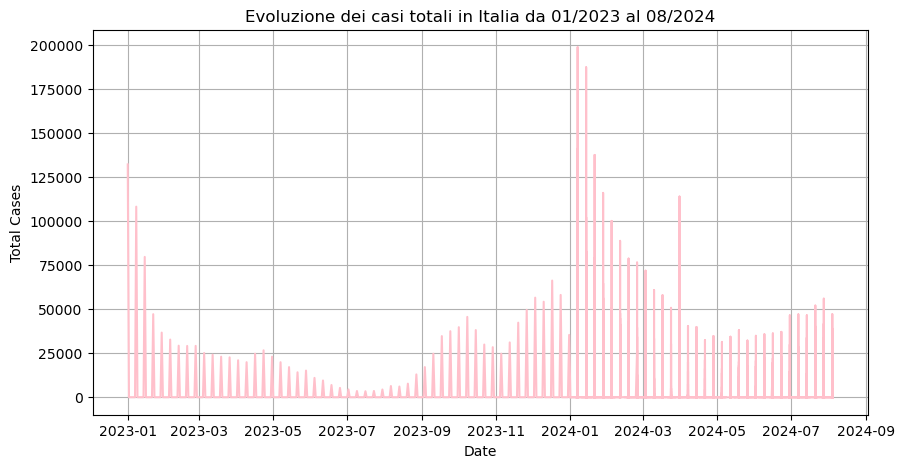

In [40]:
# b. il numero di nuovi casi rispetto alla data (numero di casi dopo 2022)


filtro = (dbcovid['location'] == 'Italy') & (dbcovid['date'].dt.year == 2023) | (dbcovid['date'].dt.year == 2024)
Italy23_24 = dbcovid.loc[filtro]
display(Italy23_24)

Italy23_24 = Italy23_24.sort_values(by='date')
#ordino le date

tot_casi_italia_23_24 = Italy23_24['new_cases'].sum()
display(f'il totale dei casi in Italia tra il 2023 e il 2024 è di: {tot_casi_italia_23_24}')
#ho sommato tutti i casi in italia 23/24

plt.figure(figsize=[10, 5])
#imposto la grandezza del graFico (larghezza e altezza)

plt.plot(Italy23_24['date'], Italy23_24['new_cases'], label='Casi Totali in Italia', color='pink')
#creo un grafico 

plt.title("Evoluzione dei casi totali in Italia da 01/2023 al 08/2024")
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.grid(True)

il totale dei casi nel 2022 è di: 19438072.0
il totale dei casi nel 2023 è di: 1601116.0
il totale dei casi nel 2024 è di: 119459.0
il totale dei casi tra il 2023 e il 2024 è di: 10306714.0


Le statistiche e i grafici mostrano chiaramente una significativa diminuzione dei casi di COVID-19 tra il 2022 e il biennio 2023-2024. Confrontando i dati del 2022 con quelli relativi ai due anni successivi (2023 e 2024), si evidenzia un notevole calo dei contagi, con un alto picco nel Gennaio 2023


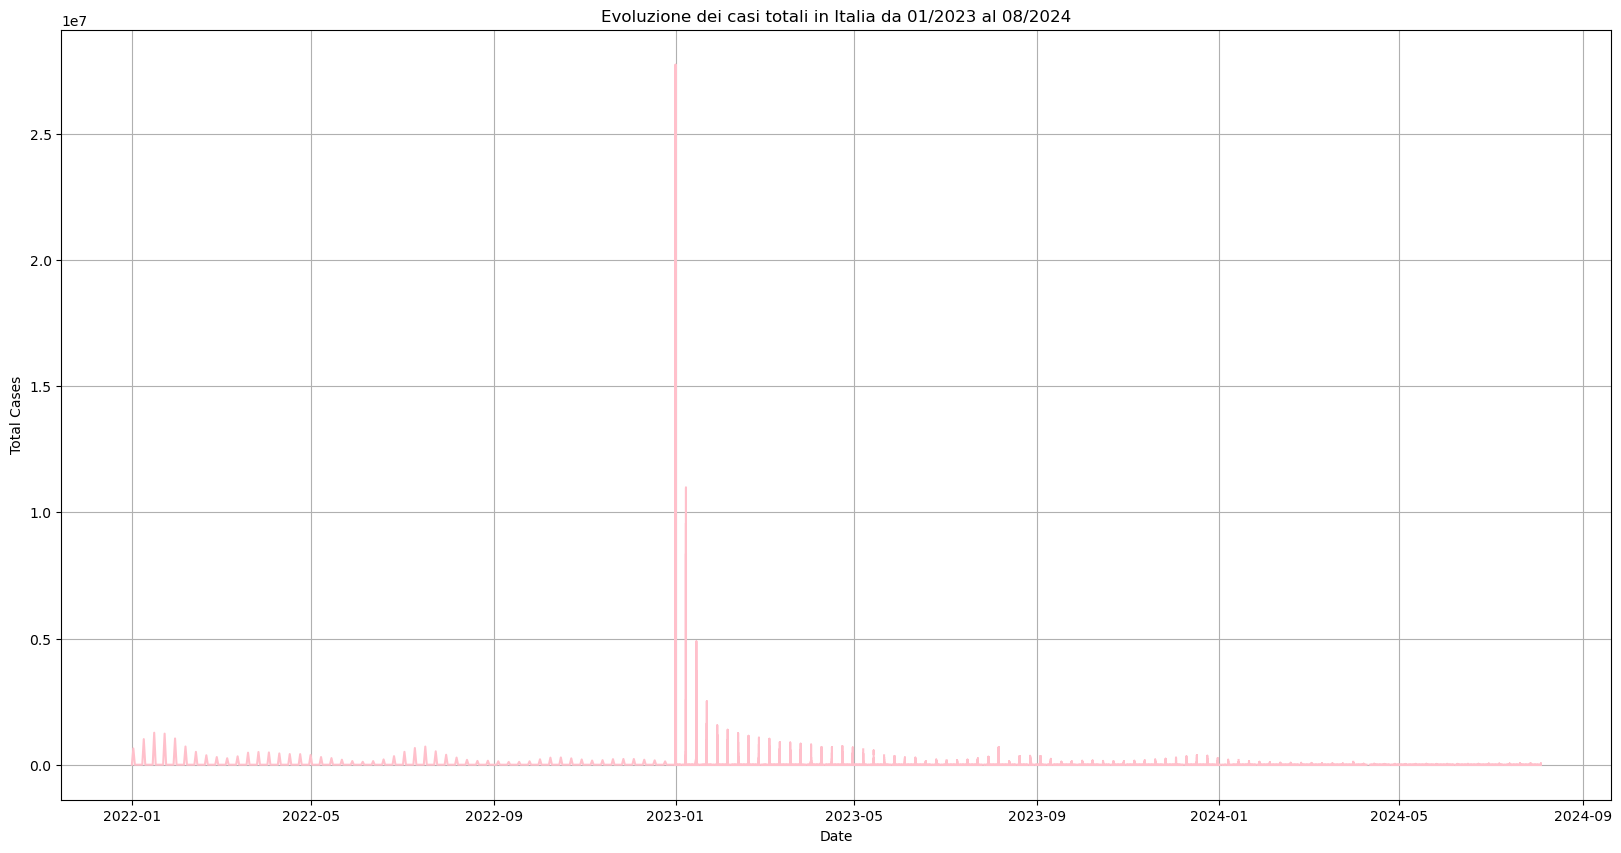

In [46]:
# voglio comparare totale casi 2022 al totale casi 2023/2024
print(f'il totale dei casi nel 2022 è di: {tot_casi_italia_2022}')
print(f'il totale dei casi nel 2023 è di: {tot_casi_italia_2023}')
print(f'il totale dei casi nel 2024 è di: {tot_casi_italia_2024}')
print(f'il totale dei casi tra il 2023 e il 2024 è di: {tot_casi_italia_23_24}')

print('\n')

print('Le statistiche e i grafici mostrano chiaramente una significativa diminuzione dei casi di COVID-19 tra il 2022 e il biennio 2023-2024. Confrontando i dati del 2022 con quelli relativi ai due anni successivi (2023 e 2024), si evidenzia un notevole calo dei contagi, con un alto picco nel Gennaio 2023')

filtro = (dbcovid['location'] == 'Italy') & (dbcovid['date'].dt.year == 2022) | (dbcovid['date'].dt.year == 2023) | (dbcovid['date'].dt.year == 2024)
Italy22_23_24 = dbcovid.loc[filtro]


Italy22_23_24 = Italy22_23_24.sort_values(by='date') 

plt.figure(figsize=[20, 10])
#imposto la grandezza del graFico (larghezza e altezza)

plt.plot(Italy22_23_24['date'], Italy22_23_24['new_cases'], label='Casi Totali in Italia', color='pink')
#creo un grafico 

plt.title("Evoluzione dei casi totali in Italia da 01/2023 al 08/2024")
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.grid(True)

## **# 4 Riguardo le nazioni di Italia, Germania e Francia:**

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
131214,FRA,Europe,France,2022-05-01,27742592.0,376510.0,53787.143,146744.0,867.0,123.857,...,35.6,NaN,5.98,82.66,0.901,67813000,89536.72,6.19,6.24,1385.4463
141258,DEU,Europe,Germany,2022-05-01,24953200.0,596917.0,85273.857,141406.0,678.0,96.857,...,33.1,NaN,8.00,81.33,0.947,83369840,93649.31,4.11,6.58,1123.2997
186122,ITA,Europe,Italy,2022-05-01,16463200.0,383991.0,54855.857,163507.0,898.0,128.286,...,27.8,NaN,3.18,83.51,0.892,59037472,186897.39,12.24,9.10,3165.7417
186123,ITA,Europe,Italy,2022-05-02,16463200.0,0.0,54855.857,163507.0,0.0,128.286,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
131215,FRA,Europe,France,2022-05-02,27742592.0,0.0,53787.143,146744.0,0.0,123.857,...,35.6,NaN,5.98,82.66,0.901,67813000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186484,ITA,Europe,Italy,2023-04-28,25772459.0,0.0,3808.429,189627.0,0.0,26.714,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
186485,ITA,Europe,Italy,2023-04-29,25772459.0,0.0,3808.429,189627.0,0.0,26.714,...,27.8,NaN,3.18,83.51,0.892,59037472,NaN,NaN,NaN,NaN
141621,DEU,Europe,Germany,2023-04-29,38396064.0,0.0,1638.286,174244.0,0.0,33.000,...,33.1,NaN,8.00,81.33,0.947,83369840,NaN,NaN,NaN,NaN
141622,DEU,Europe,Germany,2023-04-30,38405257.0,9193.0,1313.286,174406.0,162.0,23.143,...,33.1,NaN,8.00,81.33,0.947,83369840,200117.06,6.17,5.49,2402.5205



Il boxplot mostra che Italia, Germania e Francia hanno distribuzioni diverse dei pazienti in terapia intensiva tra maggio 2022 e aprile 2023. Italia presenta una maggiore variabilità, con picchi elevati, mentre Germania e Francia hanno distribuzioni più stabili, con la Francia che mostra meno variabilità. Ciò suggerisce diverse risposte sanitarie e pratiche di gestione dei casi nei tre paesi


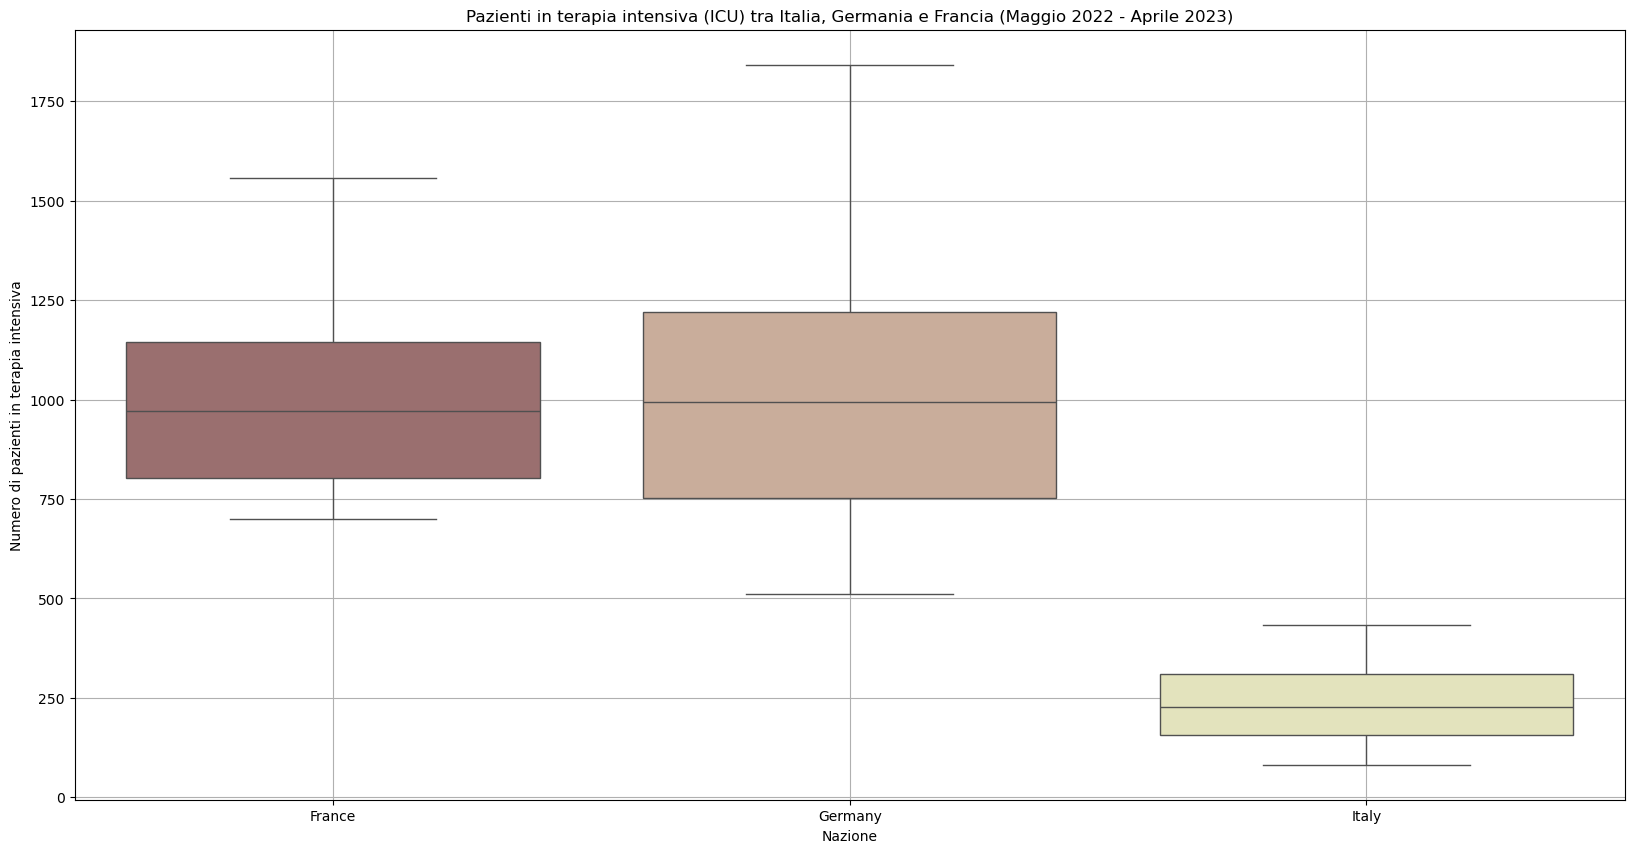

In [50]:
# 4 Riguardo le nazioni di Italia, Germania e Francia:
# a. mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU, considerare quindi la colonna icu_patients)
# da maggio 2022 (incluso) ad aprile 2023 (incluso) 

filtro = ((dbcovid['location'] == 'Italy') | (dbcovid['location'] == 'Germany') | (dbcovid['location'] == 'France')) & (dbcovid['date'] >= '2022-05-01') & (dbcovid['date'] <= '2023-04-30')
nazioni_data = dbcovid.loc[filtro]
nazioni_data = nazioni_data.dropna(subset=['icu_patients'])
#mi seleziono le nazioni richieste nella data specifica

nazioni_data = nazioni_data.sort_values(by='date') 
#ordino la data

display(nazioni_data)

plt.figure(figsize=(20, 10))
sns.boxplot(data=nazioni_data, x='location', y='icu_patients', hue='location',  palette='pink')
#creo un boxplot

plt.title('Pazienti in terapia intensiva (ICU) tra Italia, Germania e Francia (Maggio 2022 - Aprile 2023)')
plt.xlabel('Nazione')
plt.ylabel('Numero di pazienti in terapia intensiva')
plt.grid(True)
#assegno nomi e titolo

# b. scrivere un breve commento (una o due righe) riguardo che conclusioni possiamo trarre osservando il grafico risultante
print('\nIl boxplot mostra che Italia, Germania e Francia hanno distribuzioni diverse dei pazienti in terapia intensiva tra maggio 2022 e aprile 2023. Italia presenta una maggiore variabilità, con picchi elevati, mentre Germania e Francia hanno distribuzioni più stabili, con la Francia che mostra meno variabilità. Ciò suggerisce diverse risposte sanitarie e pratiche di gestione dei casi nei tre paesi')

## **#5 Riguardo le nazioni di Italia, Germania, Francia e Spagna in tutto il 2021:** 


388779
location
France    6008717.0
Italy     4419950.0
Spain     2411706.0
Name: hosp_patients, dtype: float64


La Germania presenta valori vuoti per quanto riguarda le ospedalizzazioni nel 2021, il che risulta anomalo, considerando la gravità della pandemia durante quel periodo. Questo richiederebbe un'analisi più approfondita e ricerche aggiuntive per verificare l'accuratezza dei dati. Tuttavia, i valori nulli in questo dataset sono rappresentati in una forma non standard, motivo per cui, malgrado il tentativo di eliminarli, non si ottiene alcun cambiamento. Nonostante ciò, questi valori non influenzano significativamente l'analisi svolta in questo esercizio.


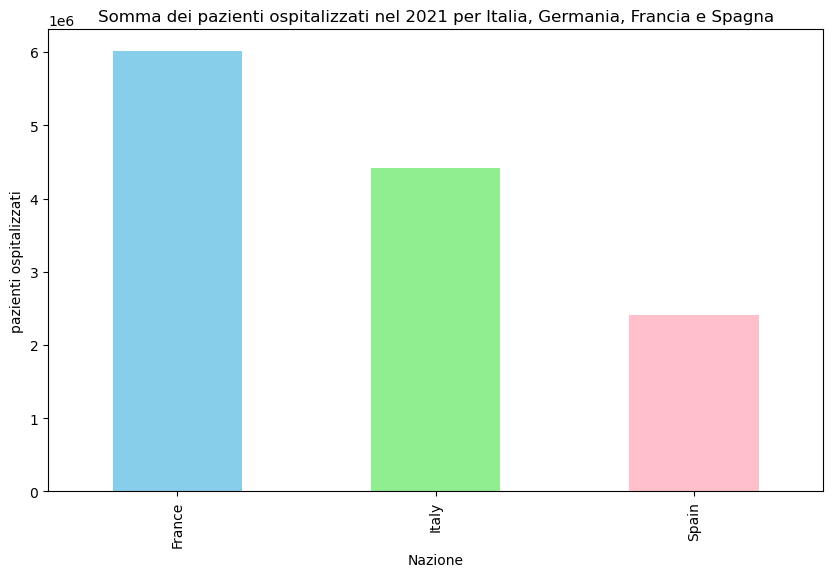

In [52]:
#5 Riguardo le nazioni di Italia, Germania, Francia e Spagna in tutto il 2021: 
# a. mostrare, in maniera grafica oppure numerica, la somma dei pazienti ospitalizzati per ognuna (colonna hosp_patients) 

print(dbcovid['hosp_patients'].isna().sum())  #388779 valori nulli

filtro = ((dbcovid['location'] == 'Italy') | (dbcovid['location'] == 'Germany') | (dbcovid['location'] == 'France') | (dbcovid['location'] == 'Spain')) & (dbcovid['date'].dt.year == 2021)
nazioni_hosp = dbcovid.loc[filtro]
nazioni_hosp = nazioni_hosp.dropna(subset=['hosp_patients'])

somma_hosp = nazioni_hosp.groupby('location')['hosp_patients'].sum()
print(somma_hosp)

plt.figure(figsize=(10, 6))
somma_hosp.plot(kind='bar', color=['skyblue', 'lightgreen', 'pink', 'purple'])
plt.title('Somma dei pazienti ospitalizzati nel 2021 per Italia, Germania, Francia e Spagna')
plt.xlabel('Nazione')
plt.ylabel('pazienti ospitalizzati')


# b. se ci sono dati nulli, con un breve commento scrivere se può essere possibile gestirli tramite sostituzione o meno
print("\n\nLa Germania presenta valori vuoti per quanto riguarda le ospedalizzazioni nel 2021, il che risulta anomalo, considerando la gravità della pandemia durante quel periodo. Questo richiederebbe un'analisi più approfondita e ricerche aggiuntive per verificare l'accuratezza dei dati. Tuttavia, i valori nulli in questo dataset sono rappresentati in una forma non standard, motivo per cui, malgrado il tentativo di eliminarli, non si ottiene alcun cambiamento. Nonostante ciò, questi valori non influenzano significativamente l'analisi svolta in questo esercizio.")